In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("sentence_times.csv")
df.head(len(df))

,Sentence,Start (s),End (s),Sentence Duration (s)
0,Today was busy with preparations.,0.918612,3.869005,2.950393
1,Many of the students collected several importa...,3.822906,7.556997,3.734091
2,John gave the book to Mark then put the keys o...,7.741396,11.567687,3.826291
3,Sally opened the closet and removed a sweater.,11.752087,15.393978,3.641891
4,Fred closed the door and left the room.,15.393978,18.482671,3.088693
5,Mary delivered the computer to Susan then hand...,18.482671,23.876358,5.393687
6,All of the class had lots of things to do.,24.660056,27.103350,2.443294
7,"Eventually, everyone completed the task they n...",27.518249,31.482840,3.964591


In [49]:
df["Sentence Length"] = df["Sentence"].astype(str).str.split().str.len()

In [50]:
def get_syllable_count(word:str) -> int:
	from requests import get

	response = get(f"https://rhymebrain.com/talk?function=getWordInfo&word={word}")
	dct = response.json()
	return int(dct["syllables"])


df["Syllable Length"] = df["Sentence"].apply(lambda sentence: sum((get_syllable_count(word) for word in sentence.split())))

In [51]:
df.head(len(df))

,Sentence,Start (s),End (s),Sentence Duration (s),Sentence Length,Syllable Length
0,Today was busy with preparations.,0.918612,3.869005,2.950393,5,10
1,Many of the students collected several importa...,3.822906,7.556997,3.734091,8,16
2,John gave the book to Mark then put the keys o...,7.741396,11.567687,3.826291,13,13
3,Sally opened the closet and removed a sweater.,11.752087,15.393978,3.641891,8,13
4,Fred closed the door and left the room.,15.393978,18.482671,3.088693,8,8
5,Mary delivered the computer to Susan then hand...,18.482671,23.876358,5.393687,13,22
6,All of the class had lots of things to do.,24.660056,27.103350,2.443294,10,10
7,"Eventually, everyone completed the task they n...",27.518249,31.482840,3.964591,9,19


In [52]:
df["Words per Minute"] = (df["Sentence Length"] / df["Sentence Duration (s)"]) * 60
df["Syllables per Second"] = df["Syllable Length"] / df["Sentence Duration (s)"]

In [53]:
df.head(len(df))

,Sentence,Start (s),End (s),Sentence Duration (s),Sentence Length,Syllable Length,Words per Minute,Syllables per Second
0,Today was busy with preparations.,0.918612,3.869005,2.950393,5,10,101.681369,3.389379
1,Many of the students collected several importa...,3.822906,7.556997,3.734091,8,16,128.545341,4.284845
2,John gave the book to Mark then put the keys o...,7.741396,11.567687,3.826291,13,13,203.852765,3.397546
3,Sally opened the closet and removed a sweater.,11.752087,15.393978,3.641891,8,13,131.799661,3.569574
4,Fred closed the door and left the room.,15.393978,18.482671,3.088693,8,8,155.405539,2.590092
5,Mary delivered the computer to Susan then hand...,18.482671,23.876358,5.393687,13,22,144.613508,4.078843
6,All of the class had lots of things to do.,24.660056,27.103350,2.443294,10,10,245.570120,4.092835
7,"Eventually, everyone completed the task they n...",27.518249,31.482840,3.964591,9,19,136.205727,4.792424


In [200]:
from os import linesep

with open("washington_lab1_table.tex", 'w') as file:
	width_format = r"{{>\centering}}p{{{}\textwidth}}"
	file.write(f"\\begin{{tabular}}{{|C{{0.1}}C{{0.2}}{'C{0.15}' * 2}{'C{0.23}' * 2}|}}\n\t\\hline\n\tSentence Number")
	df.drop(columns=["Sentence", "Start (s)", "End (s)"]).to_csv(file, sep="&", lineterminator=r"\\" + linesep, index=True, header=("Sentence Duration (s)", "Words per Sentence", "Syllables per Sentence", "Words per Minute (w.p.m)", "Syllables per Seconds (s.p.s)"))
	file.write(r"\hline\end{tabular}")

In [72]:
odd = df[df.index % 2 == 1].drop(index=7)
even = df[df.index % 2 == 0].drop(index=0)

In [73]:
odd.head(len(odd))

,Sentence,Start (s),End (s),Sentence Duration (s),Sentence Length,Syllable Length,Words per Minute,Syllables per Second
1,Many of the students collected several importa...,3.822906,7.556997,3.734091,8,16,128.545341,4.284845
3,Sally opened the closet and removed a sweater.,11.752087,15.393978,3.641891,8,13,131.799661,3.569574
5,Mary delivered the computer to Susan then hand...,18.482671,23.876358,5.393687,13,22,144.613508,4.078843


In [74]:
even.head(len(even))

,Sentence,Start (s),End (s),Sentence Duration (s),Sentence Length,Syllable Length,Words per Minute,Syllables per Second
2,John gave the book to Mark then put the keys o...,7.741396,11.567687,3.826291,13,13,203.852765,3.397546
4,Fred closed the door and left the room.,15.393978,18.482671,3.088693,8,8,155.405539,2.590092
6,All of the class had lots of things to do.,24.660056,27.103350,2.443294,10,10,245.570120,4.092835


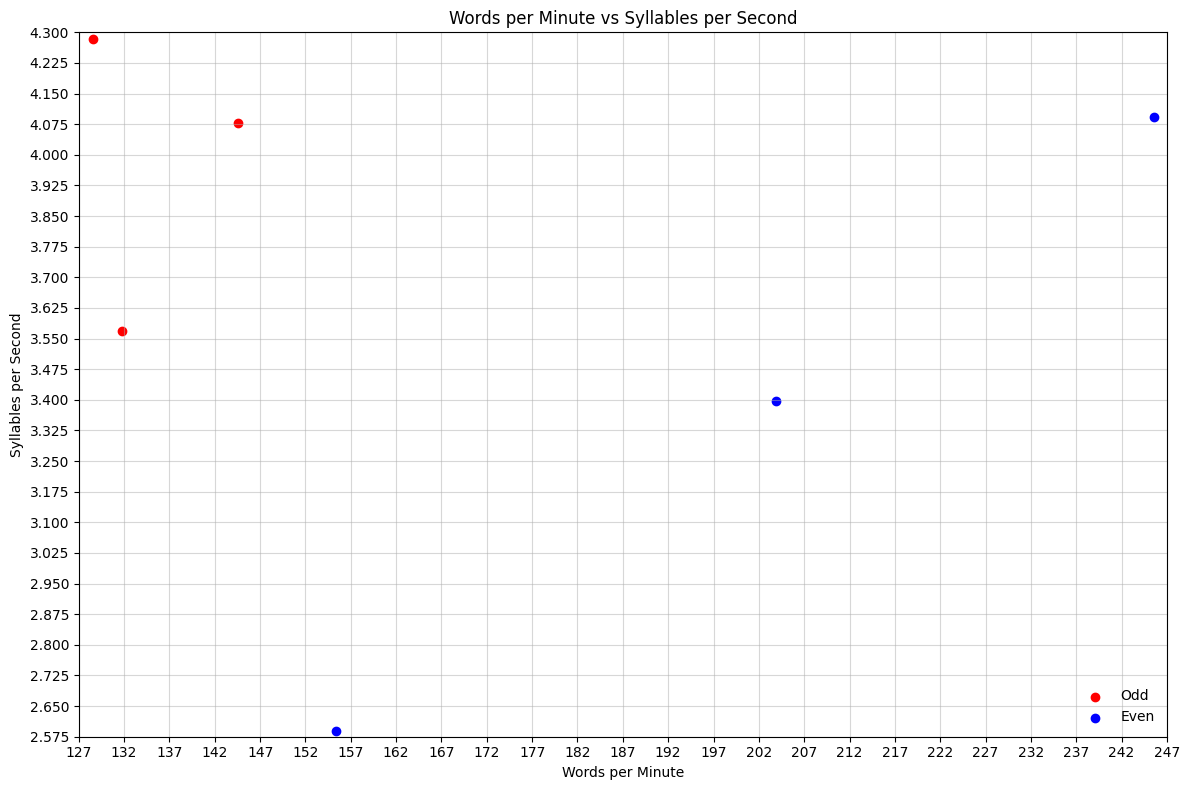

In [202]:
fig = plt.figure(figsize=(12,8))

plt.scatter(odd["Words per Minute"], odd["Syllables per Second"], label="Odd", color="r")
plt.scatter(even["Words per Minute"], even["Syllables per Second"], label="Even", color="b")

plt.title("Words per Minute vs Syllables per Second")
plt.xlabel("Words per Minute")
plt.ylabel("Syllables per Second")

plt.xlim(127, 247)
plt.ylim(2.575, 4.3)

plt.xticks(np.arange(127, 252, 5))
plt.yticks(np.arange(2.575, 4.35, 0.075))

plt.legend(loc="lower right", framealpha=0)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("washington_lab1_graph.svg", transparent=True)